In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv('digit recognizor.csv')

In [6]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

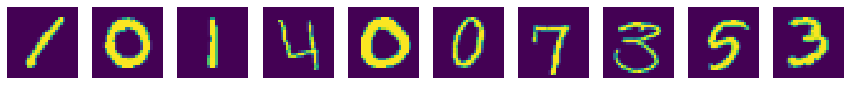

In [67]:
plt.figure(figsize=[15,5])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(np.array(x.loc[i]).reshape(28,28))
    plt.axis('off')
plt.show()

# Random Forest

In [52]:
RFC =RandomForestClassifier(n_estimators=100, random_state=1)
score = cross_val_score(RFC, x, y, cv=5).mean()
print(score)

0.964000209321459


# PCA

In [46]:
pca = PCA().fit(x)

Text(0, 0.5, 'Explained_variance_ratio')

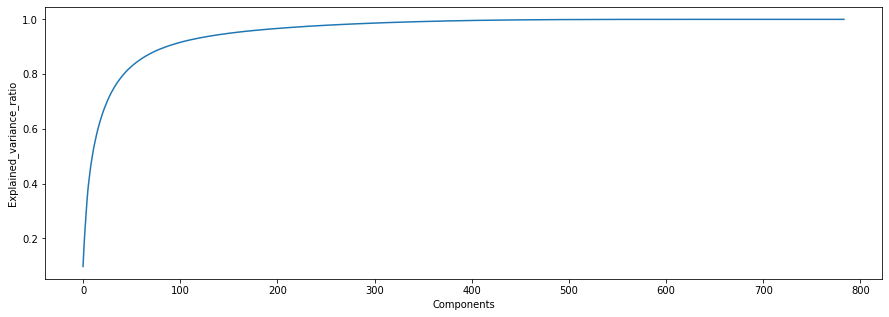

In [47]:
plt.figure(figsize=[15,5])
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Components')
plt.ylabel('Explained_variance_ratio')

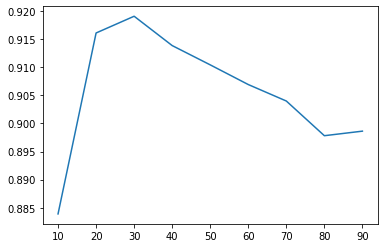

In [50]:
score_all = []
for i in range(10, 91, 10):
    x_pca = PCA(i).fit_transform(x)
    RFC = RandomForestClassifier(n_estimators=10, random_state=1)
    score = cross_val_score(RFC, x_pca, y, cv=5).mean()
    score_all.append(score)
plt.plot(range(10, 91, 10), score_all)

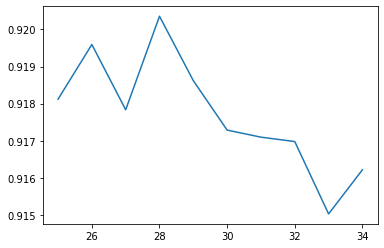

In [51]:
score_all = []
for i in range(25, 35, 1):
    x_pca = PCA(i).fit_transform(x)
    RFC = RandomForestClassifier(n_estimators=10, random_state=1)
    score = cross_val_score(RFC, x_pca, y, cv=5).mean()
    score_all.append(score)
plt.plot(range(25, 35, 1), score_all)

In [53]:
x_pca = PCA(28).fit_transform(x)
RFC =RandomForestClassifier(n_estimators=100, random_state=1)
score = cross_val_score(RFC, x_pca, y, cv=5).mean()
print(score)

0.9467384632303787


# KNN

In [70]:
x_pca = PCA(28).fit_transform(x)
KNN = KNeighborsClassifier(5)
score = cross_val_score(KNN, x_pca, y, cv=5).mean()
print(score)

0.971499504963167
